# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


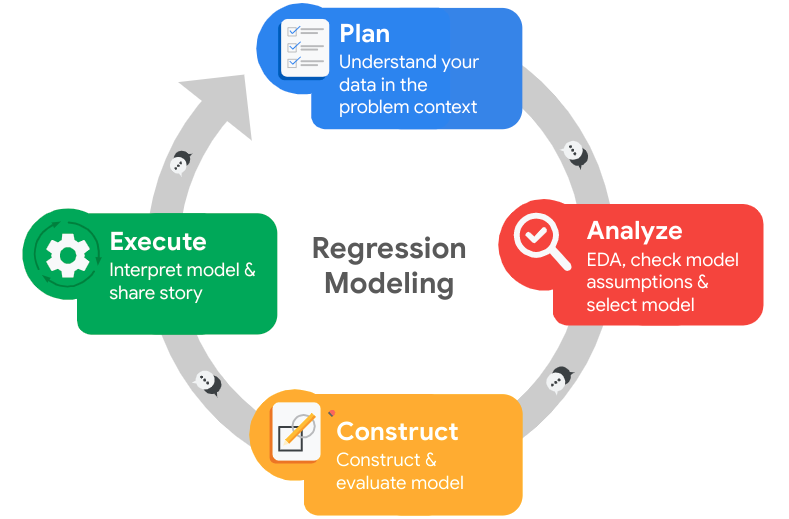

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders are the HR department and possibly the leadership team.
2. We want to build a model to predict employee turnover and identify what is likely to make them leave the company.
3. There is no missing data but 3008 rows of duplicates, which reduce the data size from 14999 to 11991 rows. The min and max values of all continuous data are plausible. However, the box plot of "time spent in the company" variable shows that there are 824 rows that lie beyond 1.5 times 75% quantile.
4. Pandas documentation
5. We cannot identify individuals whatsoever based on the collected data. No data such as gender, ethnic background or sexsual orientation are used. So far there is no ethical issues.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [58]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [59]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [60]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [61]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Observation: Min and max for all continuous data features seem plausible. The majority of the people who completed the survey are from the sales department and half of the participants belong to the low-salary category.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [62]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
# Rename columns as needed
### YOUR CODE HERE ###
mapper = {'last_evaluation': 'last_eval_score', 'average_montly_hours': 'avg_monthly_hours', 
          'number_project': 'num_proj','time_spend_company': 'time_spent', 'Work_accident': 'work_accident', 
          'Department': 'department'}
df = df0.rename(columns=mapper)
# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_eval_score', 'num_proj',
       'avg_monthly_hours', 'time_spent', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [64]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

satisfaction_level       0
last_eval_score          0
num_proj                 0
avg_monthly_hours        0
time_spent               0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [65]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

3008

In [66]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated(keep=False)].sort_values(by='last_eval_score')

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary
13711,0.49,0.36,2,192,3,0,0,0,sales,low
11119,0.19,0.36,3,167,5,0,0,0,sales,low
13379,0.17,0.36,6,191,2,0,0,0,product_mng,medium
11500,0.49,0.36,2,192,3,0,0,0,sales,low
13330,0.19,0.36,3,167,5,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
12390,0.78,1.00,4,253,5,0,1,0,marketing,low
12346,0.81,1.00,4,253,5,0,1,0,technical,low
12342,0.90,1.00,5,232,5,0,1,0,technical,medium
719,0.80,1.00,5,260,5,0,1,0,hr,low


In [67]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

In [68]:
sns.set_theme(style="darkgrid")

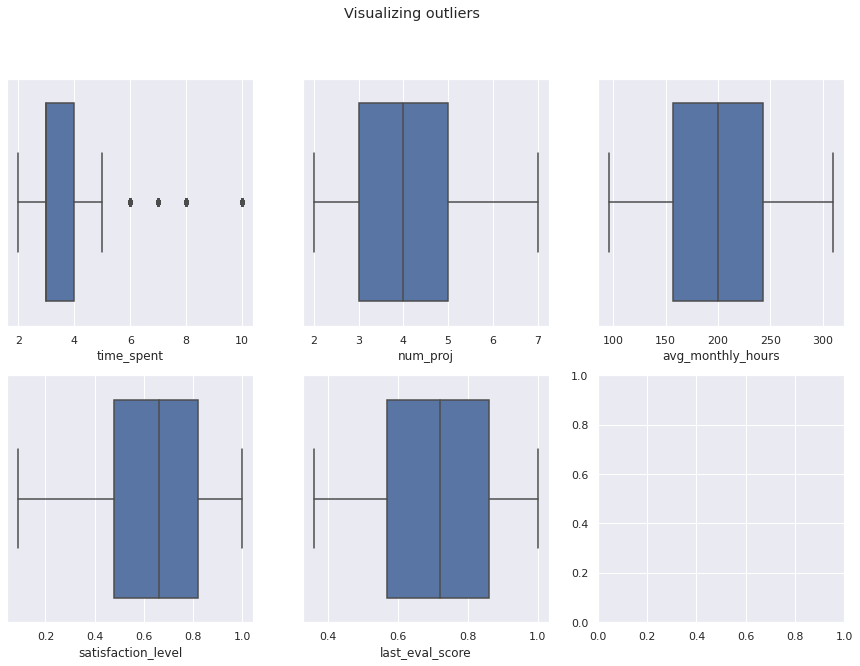

In [69]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
fig, ax = plt.subplots(2,3, figsize = [15, 10])
sns.boxplot(x=df["time_spent"], ax = ax[0,0])
sns.boxplot(x=df["num_proj"],ax = ax[0,1])
sns.boxplot(x=df["avg_monthly_hours"],ax = ax[0,2])
sns.boxplot(x=df["satisfaction_level"], ax = ax[1,0])
sns.boxplot(x=df["last_eval_score"], ax = ax[1,1])
fig.suptitle('Visualizing outliers')
plt.show()

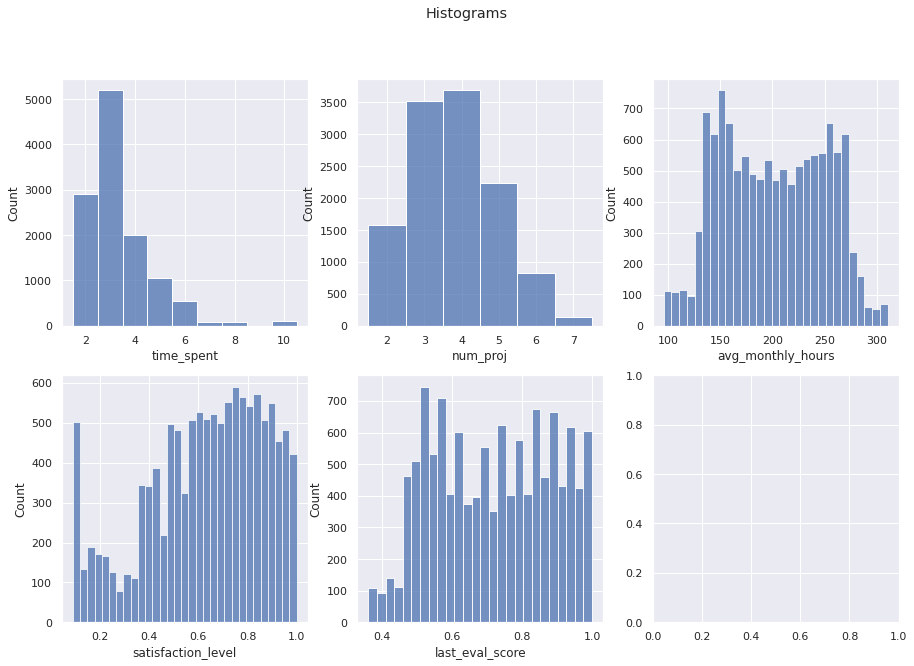

In [70]:
fig, ax = plt.subplots(2,3, figsize = [15, 10])
sns.histplot(x=df["time_spent"], ax = ax[0,0], discrete=True)
sns.histplot(x=df["num_proj"],ax = ax[0,1], discrete=True)
sns.histplot(x=df["avg_monthly_hours"],ax = ax[0,2])
sns.histplot(x=df["satisfaction_level"], ax = ax[1,0])
sns.histplot(x=df["last_eval_score"], ax = ax[1,1])
fig.suptitle('Histograms')
plt.show()

In [71]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# define outliers as beyond 1.5 * IQR (inc.)
Q1 = np.percentile(df['time_spent'], 25)
Q3 = np.percentile(df['time_spent'], 75)
IQR = Q3 - Q1
df[df['time_spent']>Q3+IQR*1.5].sort_values(by='time_spent')

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
8062,0.24,0.91,5,258,6,0,0,0,support,low
8027,0.86,0.79,3,106,6,1,0,0,sales,medium
8022,0.98,0.98,5,210,6,0,0,0,sales,low
7993,0.17,0.60,5,144,6,0,0,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
11613,0.56,0.85,3,265,10,1,0,0,management,low
11619,0.57,0.91,4,224,10,0,0,0,sales,medium
11620,0.63,0.65,3,190,10,0,0,0,sales,medium
11580,0.51,0.86,3,182,10,0,0,0,sales,low


In [72]:
# define outliers as beyond 2 * IQR (inc.)
df[df['time_spent']>Q3+IQR*2].sort_values(by='time_spent')

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary
11726,0.57,0.82,5,233,7,0,0,1,sales,medium
11650,0.97,0.38,5,211,7,1,0,0,sales,medium
11651,0.61,0.77,5,232,7,0,0,0,sales,medium
11524,0.81,0.47,4,153,7,0,0,0,product_mng,low
11523,0.45,0.42,4,156,7,0,0,0,product_mng,high
...,...,...,...,...,...,...,...,...,...,...
11666,0.98,0.99,4,261,10,1,0,0,sales,low
11519,0.45,0.64,3,169,10,0,0,0,IT,medium
11520,0.77,0.64,3,190,10,1,0,0,IT,medium
11527,0.25,0.89,4,154,10,0,0,0,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [73]:
# check the distributions of the categorical variables: work_acident, left, promotion, department and salary
df['work_accident'].value_counts()

0    10141
1     1850
Name: work_accident, dtype: int64

In [74]:
df['left'].value_counts(normalize = True)
# Observation: approx. 16.6% employee surveyed have left the company. The data is imbalanced.

0    0.833959
1    0.166041
Name: left, dtype: float64

In [75]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [76]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [77]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [78]:
def plot_hist(data, x, hue, multiple, discrete=None):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = [15, 5])
    sns.histplot(data=data, x=x, hue=hue, multiple = multiple, discrete=discrete, ax = ax1)
    sns.histplot(data=data, x=x, discrete=discrete, ax = ax2)
    ax1.set_title(f'Turnover by {x} histogram', fontsize=16);
    ax2.set_title(f'{x} histogram', fontsize=16);
    if multiple == 'fill':
        ax1.set_ylabel('%')
    plt.show()

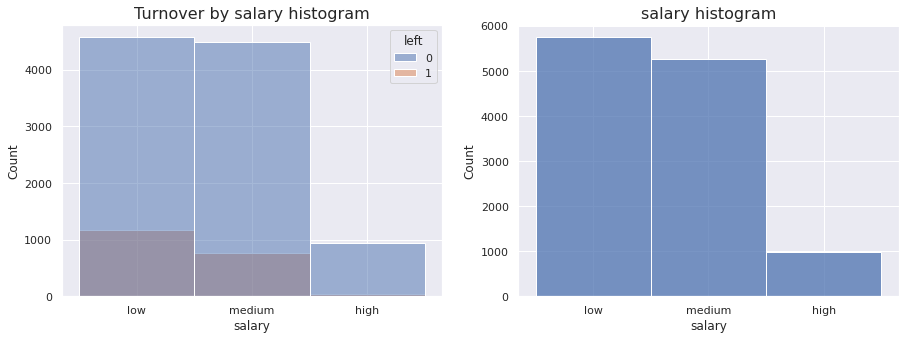

In [79]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_hist(df, x='salary', hue='left', multiple='layer')

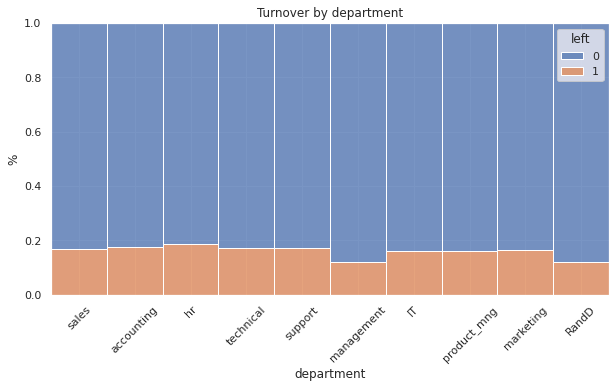

In [80]:
plt.figure(figsize = [10, 5])
sns.histplot(data=df, x='department', hue='left', multiple='fill')
plt.title('Turnover by department');
plt.xticks(rotation=45)
plt.ylabel('%')
plt.show()

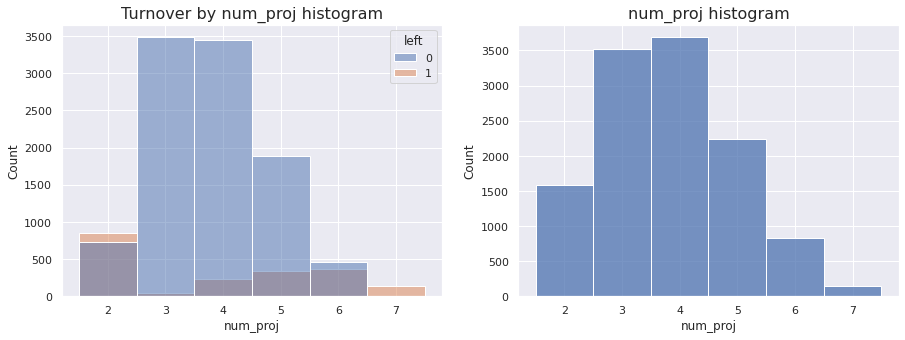

In [81]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_hist(df, x='num_proj', hue='left', multiple='layer', discrete=True)

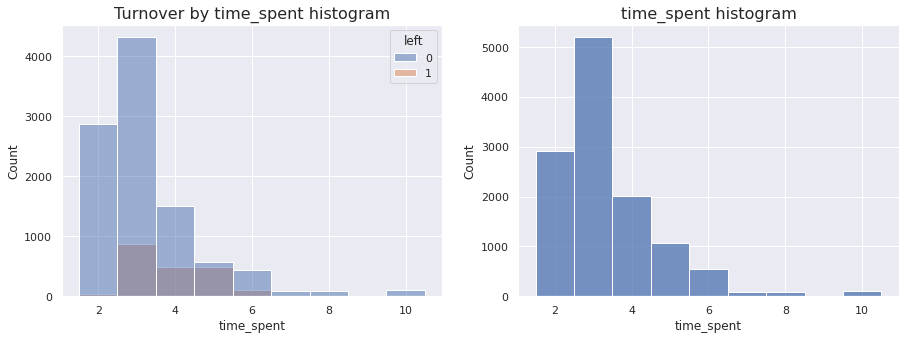

In [82]:
plot_hist(df, x='time_spent', hue='left', multiple='layer', discrete=True)

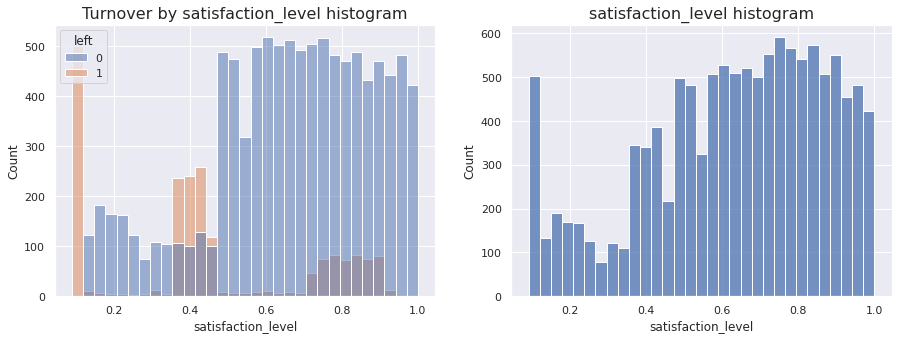

In [83]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_hist(df, x='satisfaction_level', hue='left', multiple='layer')

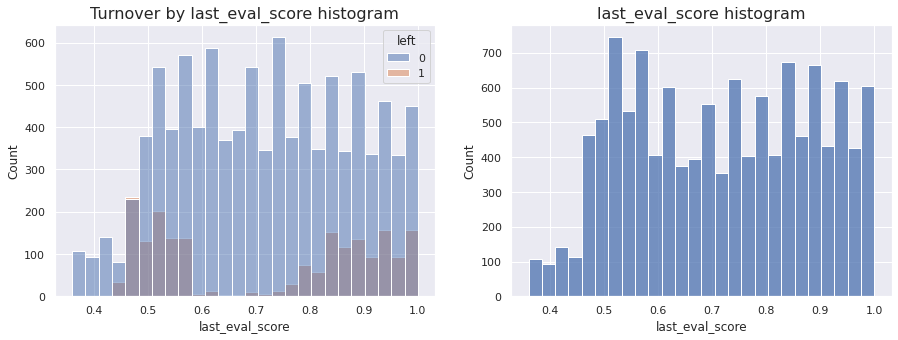

In [84]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_hist(df, x='last_eval_score', hue='left', multiple='layer')

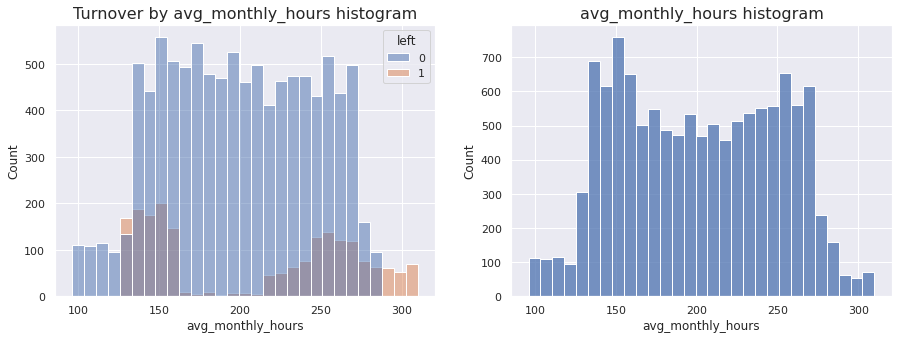

In [85]:
# Create a plot as needed
### YOUR CODE HERE ###
plot_hist(df, x='avg_monthly_hours', hue='left', multiple='layer')

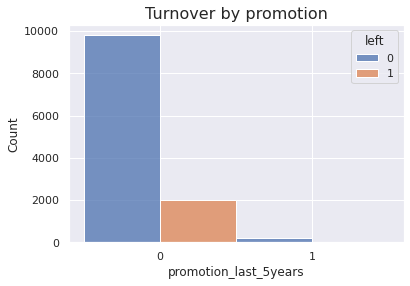

In [86]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='promotion_last_5years',hue='left', discrete=True, multiple='dodge')
plt.title('Turnover by promotion', fontsize = 16);
plt.xticks(ticks=[0,1])
plt.show()

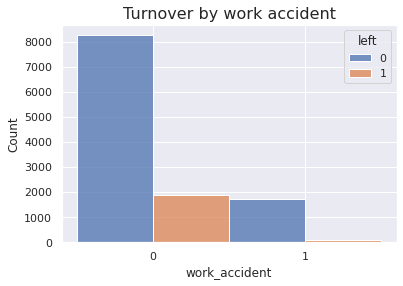

In [87]:
sns.histplot(data=df, x='work_accident',hue='left', discrete=True, multiple='dodge')
plt.title('Turnover by work accident', fontsize = 16);
plt.xticks(ticks=[0,1])
plt.show()

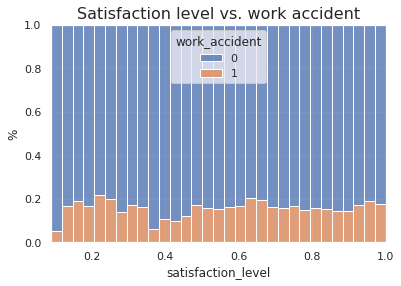

In [88]:
# Create a plot as needed
sns.histplot(data=df, x="satisfaction_level", hue="work_accident", multiple='fill')
plt.title('Satisfaction level vs. work accident', fontsize = 16);
plt.ylabel('%')
plt.show()

In [89]:
# Average hours per project worked
df['avg_hour_proj'] = round(df['avg_monthly_hours']*12*df['time_spent']/df['num_proj']).astype(int)
df.head()

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,work_accident,left,promotion_last_5years,department,salary,avg_hour_proj
0,0.38,0.53,2,157,3,0,1,0,sales,low,2826
1,0.80,0.86,5,262,6,0,1,0,sales,medium,3773
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1865
3,0.72,0.87,5,223,5,0,1,0,sales,low,2676
4,0.37,0.52,2,159,3,0,1,0,sales,low,2862


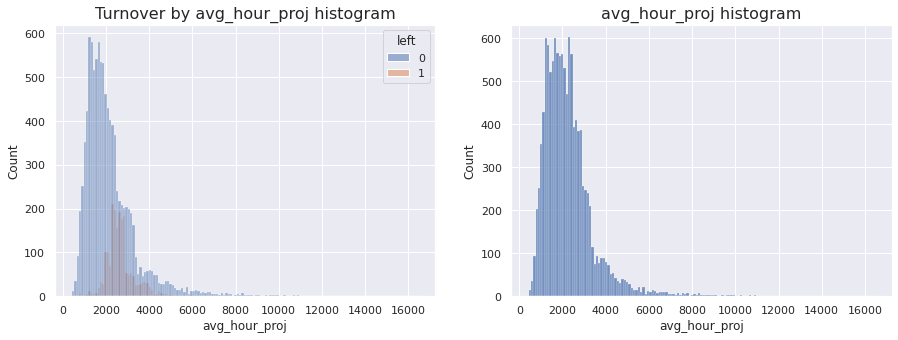

In [90]:
plot_hist(data=df, x='avg_hour_proj', hue='left', multiple='layer')

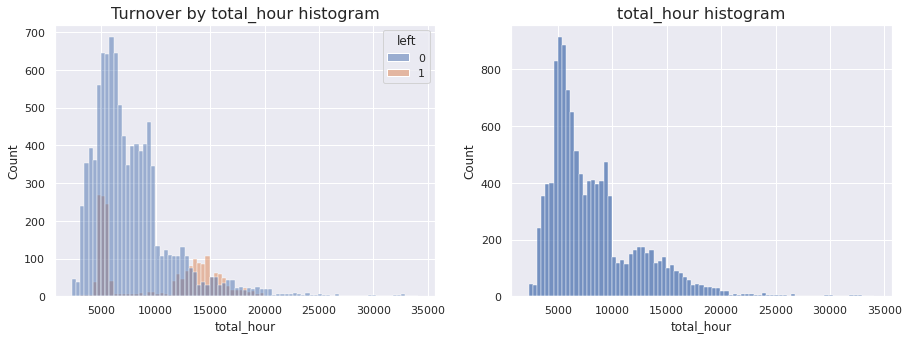

In [91]:
df['total_hour'] = df['avg_monthly_hours']*12*df['time_spent']
plot_hist(data=df, x='total_hour', hue='left', multiple='layer')

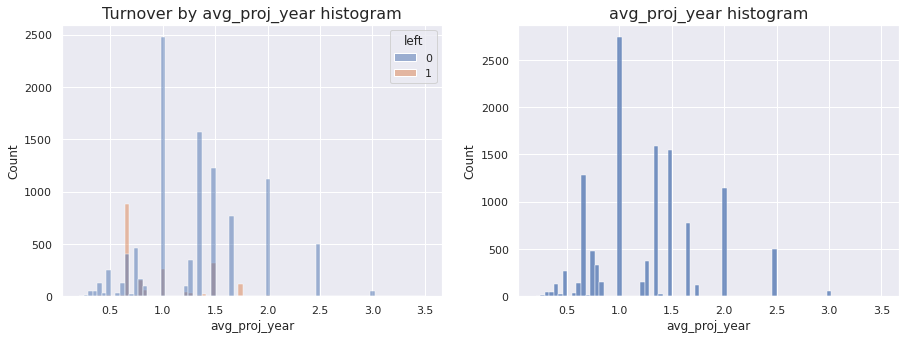

In [92]:
df['avg_proj_year'] = df['num_proj']/df['time_spent']
plot_hist(data=df, x='avg_proj_year', hue='left', multiple='layer')

In [93]:
# drop avg_proj_year and total_hour
df.drop(columns=['avg_proj_year', 'total_hour'], inplace = True)

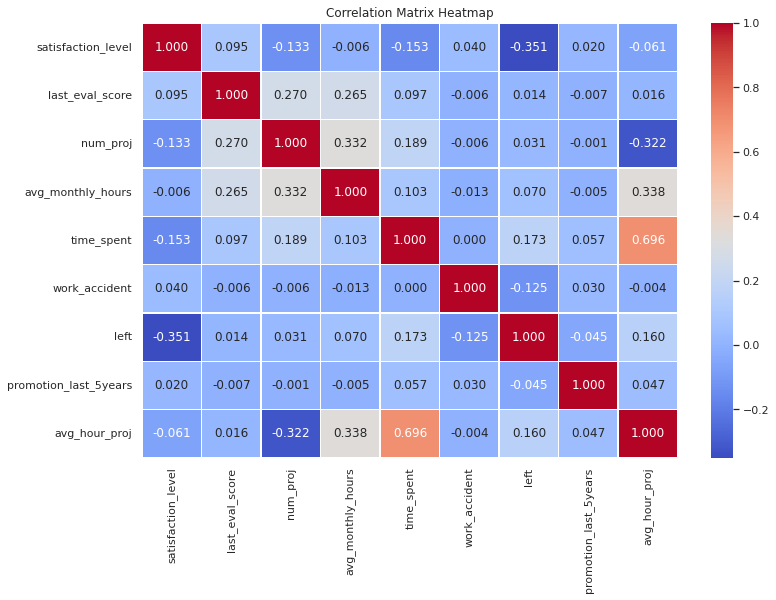

In [94]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [95]:
# Hypothesis testing
# Work accident has no bearing on retention: two-sample proportion test (two-sample z-test)
# Null hypothesis: the turnover is the same for the group of employees that had no accident and for 
#                  the group of employees that had work accident
# Alternative hypothesis: the turnover is lower for employees that had no work accidents 
# Alpha: 5%
from statsmodels.stats.proportion import proportions_ztest
nobs = df['work_accident'].value_counts() #the number of trials or observations
count = df[df['left']==1]['work_accident'].value_counts() #the number of successes in nobs trials, in this case left=1
stat, pval = proportions_ztest(count, nobs, alternative='smaller')
print(f"Z-statistic: {stat:.3f}, p-value: {pval:.3f}")

Z-statistic: 13.736, p-value: 1.000


We have a p-value = 1, therefore we cannot reject the null hypothesis and can assume the turnover is the same between the two groups. Thus we can remove the work_accident variable from our model.
Note that a one-sided test is used. That's because even if we can establish that having a work accident somehow reduces turnover, we can no way act upon this insight. However, if having work accidents increases turnover, the organization can take measures to prevent work accident.

In [96]:
# Hypothesis testing
# Department has no bearing on retention
# Null hypothesis: the turnover is the same for employees working in different departments
# Alternative hypothesis: the turnover is different between certain departments
# Alpha: 5%
from statsmodels.stats.proportion import proportions_chisquare_allpairs
nobs = df['department'].value_counts() #the number of trials or observations
count = df[df['left']==1]['department'].value_counts() #the number of successes in nobs trials
result = proportions_chisquare_allpairs(count, nobs)
result.pval_corrected()

array([0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.95994699, 0.27977679, 0.99999999,
       0.99999959, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.89385624, 0.20166424, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.95994699, 0.28971557, 0.99999999,
       0.99999999, 0.99999999, 0.99999997, 0.99997488, 0.7920954 ,
       0.99999999, 0.99999999, 0.99999999, 0.99997488, 0.81930022,
       0.99999999, 0.99999999, 0.99997488, 0.81930022, 0.99999999,
       0.99997488, 0.81930022, 0.97519936, 0.40331245, 0.99997488])

All the pair-wise p-values are larger than 0.05, therefore we cannot reject the null hypothsis and that the turnover is similar accross different departments. Thus we can remove the department variable from our model.

In [97]:
df.drop(columns=['department', 'work_accident'], inplace=True)

In [98]:
df.head()

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,left,promotion_last_5years,salary,avg_hour_proj
0,0.38,0.53,2,157,3,1,0,low,2826
1,0.80,0.86,5,262,6,1,0,medium,3773
2,0.11,0.88,7,272,4,1,0,medium,1865
3,0.72,0.87,5,223,5,1,0,low,2676
4,0.37,0.52,2,159,3,1,0,low,2862


In [99]:
# Pre-processing for logistic regression
# Ordinal encode salary
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories = [['low', 'medium', 'high']], dtype=np.int64)
df['salary_num'] = enc.fit_transform(df[['salary']])
df.head()

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,left,promotion_last_5years,salary,avg_hour_proj,salary_num
0,0.38,0.53,2,157,3,1,0,low,2826,0
1,0.80,0.86,5,262,6,1,0,medium,3773,1
2,0.11,0.88,7,272,4,1,0,medium,1865,1
3,0.72,0.87,5,223,5,1,0,low,2676,0
4,0.37,0.52,2,159,3,1,0,low,2862,0


In [100]:
df = df.drop(columns=['salary'])
df.head()

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,left,promotion_last_5years,avg_hour_proj,salary_num
0,0.38,0.53,2,157,3,1,0,2826,0
1,0.80,0.86,5,262,6,1,0,3773,1
2,0.11,0.88,7,272,4,1,0,1865,1
3,0.72,0.87,5,223,5,1,0,2676,0
4,0.37,0.52,2,159,3,1,0,2862,0


In [101]:
path = '/home/jovyan/work'
df.to_csv(path+'/df_clean.csv', index=False)

In [102]:
# function to find outliers in a dataframe according to IQR*factor
def outlier_index (df, column_name, factor):
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    IQR = Q3 - Q1
    outliers = df[df[column_name] > Q3 + IQR * factor]
    return outliers.index

In [103]:
# Pre-processing for logistic regression
# Remove outliers in time_spent (2*IQR)
df1 = df.drop(outlier_index(df, 'time_spent', 2))
df1.sort_values(by='time_spent', ascending = False)

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,left,promotion_last_5years,avg_hour_proj,salary_num
982,0.85,0.97,4,266,6,1,0,4788,0
9416,0.13,0.62,3,264,6,0,0,6336,0
601,0.84,0.94,5,222,6,1,0,3197,0
6887,0.16,0.88,4,201,6,0,0,3618,1
7852,0.82,0.48,4,149,6,0,0,2682,2
...,...,...,...,...,...,...,...,...,...
3969,0.57,0.56,3,224,2,0,0,1792,2
8452,0.91,0.52,3,256,2,0,0,2048,2
3966,0.82,0.58,4,202,2,0,0,1212,1
3960,0.50,0.55,3,188,2,0,0,1504,1


In [104]:
# Pre-processing for logistic regression
# Scale avg_monthly_hours 
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df1['avg_monthly_hours1'] = scaler_std.fit_transform(df1[['avg_monthly_hours']]) 
df1.drop(columns=['avg_monthly_hours', 'avg_hour_proj'], inplace=True)
df1.head()

,satisfaction_level,last_eval_score,num_proj,time_spent,left,promotion_last_5years,salary_num,avg_monthly_hours1
0,0.38,0.53,2,3,1,0,0,-0.893023
1,0.80,0.86,5,6,1,0,1,1.261118
2,0.11,0.88,7,4,1,0,1,1.466275
3,0.72,0.87,5,5,1,0,0,0.461009
4,0.37,0.52,2,3,1,0,0,-0.851992


In [105]:
df1['left'].value_counts(normalize=True)
# The class imbalance is comparable between before and after processing

0    0.82996
1    0.17004
Name: left, dtype: float64

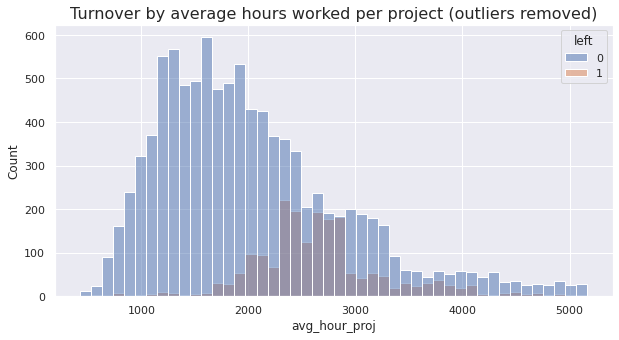

In [106]:
# Save two dfs with one dropping time_spent and the other dropping avg_hour_proj (high correlation)
# # Remove outliers in avg_monthly_hours (2*IQR)
df2 = df.drop(outlier_index(df, 'avg_hour_proj', 2))
plt.figure(figsize=[10,5])
sns.histplot(data=df2, x='avg_hour_proj', hue='left', multiple='layer')
plt.title('Turnover by average hours worked per project (outliers removed)', fontsize = 16)
plt.show()

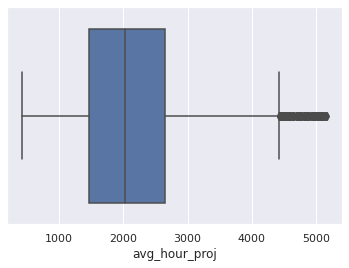

In [107]:
sns.boxplot(data=df2, x='avg_hour_proj')
plt.show()

In [108]:
# Scale avg_monthly_hours & avg_hour_proj
from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()
df2['avg_monthly_hours1'] = scaler_std.fit_transform(df2[['avg_monthly_hours']]) 
df2['avg_hour_proj1'] = scaler_robust.fit_transform(df2[['avg_hour_proj']])
df2.drop(columns=['avg_monthly_hours', 'avg_hour_proj', 'time_spent'], inplace=True)
df2.sort_values(by='avg_hour_proj1', ascending = False)

,satisfaction_level,last_eval_score,num_proj,left,promotion_last_5years,salary_num,avg_monthly_hours1,avg_hour_proj1
9866,0.12,0.81,4,0,0,1,1.794701,2.658206
2916,0.12,0.47,3,0,0,1,1.199006,2.653130
11737,0.69,0.66,3,0,0,2,0.315735,2.653130
6692,0.80,0.38,3,0,0,0,0.315735,2.653130
2223,0.53,0.72,2,0,0,0,-0.567537,2.653130
...,...,...,...,...,...,...,...,...
6778,0.34,0.67,5,0,0,0,-2.128668,-1.322335
8492,0.26,0.91,6,0,0,1,-1.779467,-1.329949
6708,0.79,0.97,6,0,0,1,-1.779467,-1.329949
7376,0.24,0.38,6,0,0,1,-1.861632,-1.343486


In [109]:
df2['left'].value_counts(normalize=True)
# The class imbalance is comparable between before and after processing

0    0.830491
1    0.169509
Name: left, dtype: float64

### Insights

[What insights can you gather from the plots you created to visualize the data?]

1. Turnover goes down as salary increases. 
2. There is no linear trend between satisfaction level, last evaluation and turnover. There are however, sweet spots, where turnover is significant lower at certain level of satisfaction and evaluation.
3. Turnover peaks at employee's fifth year in the company.
4. The sweetspot for numbers of project is 3. Working on either too few or too many projects increases turnover.
5. The sweetspot for monthly working hours is between 165 and 210 hours, working too less or too much increases the chance of turnover. Noticeably, everyone who has worked extreme amount of monthly hours, i.e., > 290 hours, has left. 
6. Hypothesis testing shows that having work accident or department has no bearing on turnovers.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
Only one of the time_spent and avg_proj_hour variables is kept in the dataframe for modelling. 
There is no strong (> 0.7) multicollinearity among other pairing of variables.
- No extreme outliers
Exetreme outliers are removed from time_spent and avg_proj_hour variables
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It's a binary classification task, i.e. whether the employee leaves the company (1) or not (0).

### Identify the types of models most appropriate for this task.

Binary logistic regression or a tree-based ML model such as random forest or boosted tree model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [110]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [111]:
X1= df1.drop(columns=['left'])
y1= df1.loc[:,['left']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify = y1, random_state=42)

In [112]:
clf=LogisticRegression(penalty='l2', class_weight='balanced', random_state=42, verbose=1, n_jobs=-1).fit(X1_train, y1_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished


In [113]:
coef1 = pd.Series(data=clf.coef_[0], index=X1.columns.values)
coef1

satisfaction_level      -4.806498
last_eval_score          0.641137
num_proj                -0.563711
time_spent               1.122718
promotion_last_5years   -0.883375
salary_num              -0.557713
avg_monthly_hours1       0.190804
dtype: float64

In [114]:
exp_coef1=pd.Series(data=[np.exp(x) for x in clf.coef_[0]], index=X1.columns.values)
exp_coef1

satisfaction_level       0.008176
last_eval_score          1.898638
num_proj                 0.569093
time_spent               3.073196
promotion_last_5years    0.413385
salary_num               0.572517
avg_monthly_hours1       1.210223
dtype: float64

In [115]:
# Verify the linear relationship between X1 and the estimated log odds (known as logits) by making a regplot.
training_probabilities = clf.predict_proba(X1_train)
training_probabilities

array([[0.91519613, 0.08480387],
       [0.39216459, 0.60783541],
       [0.64343731, 0.35656269],
       ...,
       [0.82799345, 0.17200655],
       [0.21383219, 0.78616781],
       [0.78093888, 0.21906112]])

In [116]:
logit_data = X1_train
logit_data['logit'] = [np.log(x/(1-x)) for x in training_probabilities[:, 1]]
logit_data.head()

,satisfaction_level,last_eval_score,num_proj,time_spent,promotion_last_5years,salary_num,avg_monthly_hours1,logit
7792,0.83,0.68,4,3,0,1,-0.051882,-2.378797
2227,0.61,0.95,4,4,0,0,-0.544257,0.438223
2119,0.50,0.95,5,3,0,0,0.132759,-0.590315
3134,0.93,0.95,6,3,0,0,-1.098179,-3.455688
1005,0.54,0.56,4,3,0,1,1.220087,-0.819152


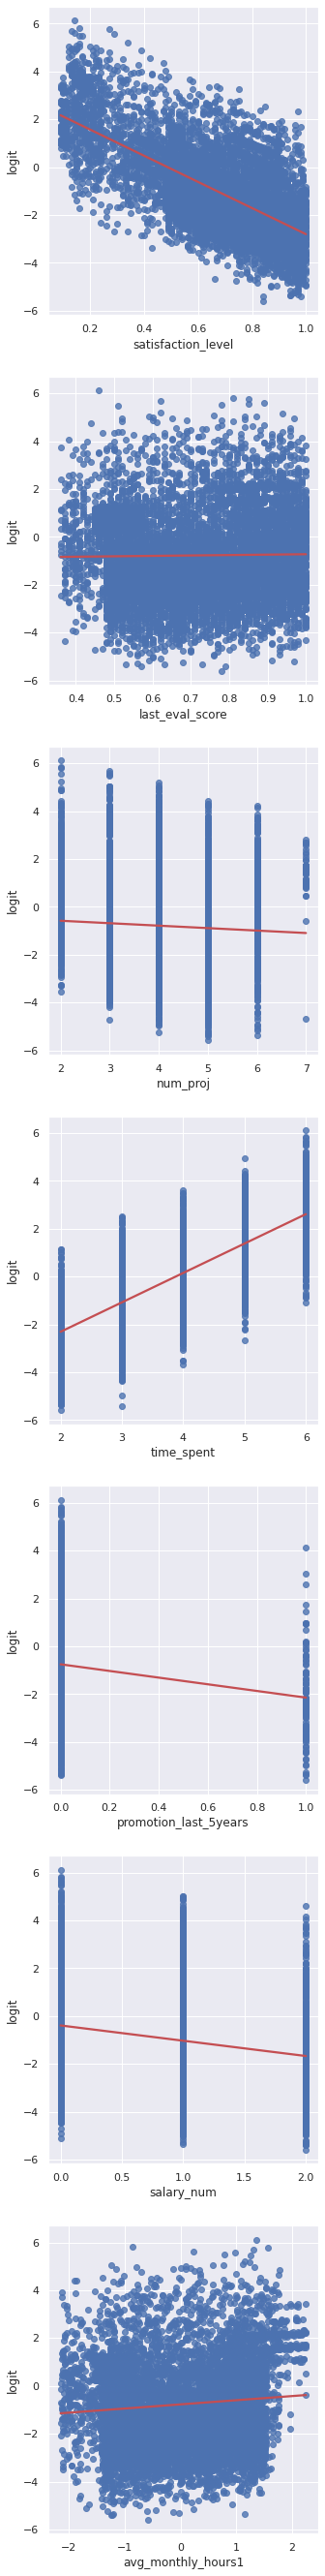

In [117]:
num_pred = logit_data.shape[1]-1
fig,axes = plt.subplots(num_pred, 1, figsize = (5,48))
for i in range(num_pred):
    sns.regplot(data = logit_data, x=logit_data.columns.values[i], y='logit', ci=None, line_kws=dict(color="r"), ax=axes[i])
plt.show()

In [118]:
clf.score(X1_test, y1_test) #accuracy

0.8013094221463137

Model using df2 (avg_hour_proj instead of time_spent)

In [119]:
X2= df2.drop(columns=['left'])
y2= df2.loc[:,['left']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify = y2, random_state=42)
clf2=LogisticRegression(penalty='l2', class_weight='balanced', random_state=42, verbose=1, n_jobs=-1).fit(X2_train, y2_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [120]:
coef2=pd.Series(data=clf2.coef_[0], index=X2.columns.values)
coef2

satisfaction_level      -4.594843
last_eval_score          1.097251
num_proj                 0.369112
promotion_last_5years   -1.146197
salary_num              -0.529418
avg_monthly_hours1      -0.613863
avg_hour_proj1           2.092196
dtype: float64

In [121]:
exp_coef2 = pd.Series(data=[np.exp(x) for x in clf2.coef_[0]], index=X2.columns.values)
exp_coef2

satisfaction_level       0.010104
last_eval_score          2.995920
num_proj                 1.446450
promotion_last_5years    0.317843
salary_num               0.588948
avg_monthly_hours1       0.541256
avg_hour_proj1           8.102691
dtype: float64

In [122]:
clf2.score(X2_test, y2_test) #accuracy

0.8100542702085118

In [123]:
training_probabilities2 = clf2.predict_proba(X2_train)
logit_data2 = X2_train
logit_data2['logit'] = [np.log(x/(1-x)) for x in training_probabilities2[:, 1]]

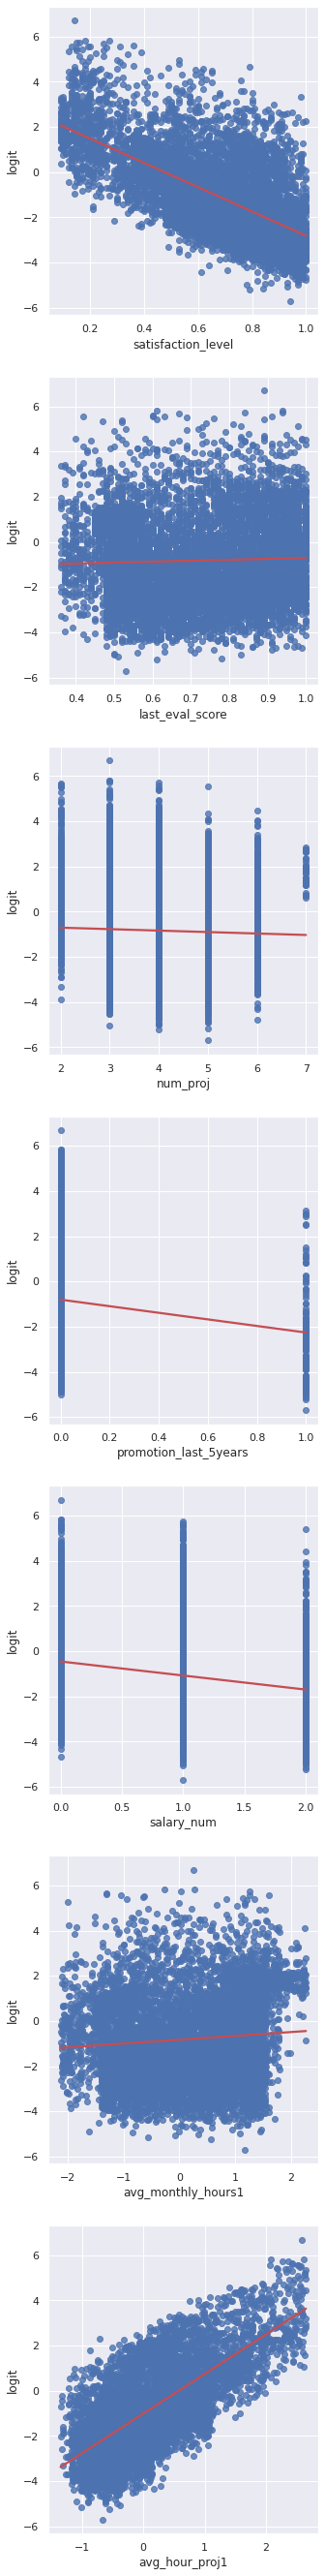

In [124]:
num_pred = logit_data2.shape[1]-1
fig,axes = plt.subplots(num_pred, 1, figsize = (5,48))
for i in range(num_pred):
    sns.regplot(data = logit_data2, x=logit_data2.columns.values[i], y='logit', ci=None, line_kws=dict(color="r"), ax=axes[i])
plt.show()

Now try a random forest model and see if the results are better

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [126]:
df_rf = pd.read_csv('df_clean.csv', )
df_rf.head()

,satisfaction_level,last_eval_score,num_proj,avg_monthly_hours,time_spent,left,promotion_last_5years,avg_hour_proj,salary_num
0,0.38,0.53,2,157,3,1,0,2826,0
1,0.80,0.86,5,262,6,1,0,3773,1
2,0.11,0.88,7,272,4,1,0,1865,1
3,0.72,0.87,5,223,5,1,0,2676,0
4,0.37,0.52,2,159,3,1,0,2862,0


In [127]:
X_rf = df_rf.drop(columns=['left'])
y_rf = df['left']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, stratify = y_rf, random_state=42)

In [129]:
cv_params = {'max_depth': [5, 10], 
             'max_samples': [0.5, 0.8],
             'min_samples_split': [100,200],
             'min_samples_leaf': [3, 5],
             'max_features': [3,4,5],
             'n_estimators': [75, 100]
             } 
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced_subsample')

In [130]:
rf_cv = GridSearchCV(estimator = rf, param_grid = cv_params, scoring = scoring, cv=4, refit='f1', n_jobs=-1, verbose = 1)
#rf_cv.fit(X_train, y_train)

In [131]:
# Pickle the model
#with open(path+'/rf_cv_model.pickle', 'wb') as to_write:
#    pickle.dump(rf_cv, to_write)

In [132]:
# Read in pickled model
with open(path + '/rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [133]:
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 5,
 'max_samples': 0.8,
 'min_samples_leaf': 3,
 'min_samples_split': 100,
 'n_estimators': 100}

In [134]:
rf_cv.best_score_

0.9391859822236102

In [135]:
rf_opt = RandomForestClassifier(random_state=42, class_weight = 'balanced_subsample', max_depth=10,
                               max_features=5, max_samples=0.8, min_samples_leaf = 3, min_samples_split=100,
                               n_estimators = 100)
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       max_samples=0.8, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




Evaluate the logistic regression model using features in df1

In [136]:
# Generate predictions on X1_test
### YOUR CODE HERE ###
y1_pred = clf.predict(X1_test)
print('Metrics of model using df1')
print(f'Accuracy:  {metrics.accuracy_score(y1_test, y1_pred):.2%}')
print(f'Precision: {metrics.precision_score(y1_test, y1_pred):.2%}')
print(f'Recall:    {metrics.recall_score(y1_test, y1_pred):.2%}')
print(f'F1:        {metrics.f1_score(y1_test, y1_pred):.2%}')

Metrics of model using df1
Accuracy:  80.13%
Precision: 45.58%
Recall:    87.27%
F1:        59.89%


In [137]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(metrics.classification_report(y1_test, y1_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.97      0.79      0.87      2916
    Predicted would leave       0.46      0.87      0.60       597

                 accuracy                           0.80      3513
                macro avg       0.71      0.83      0.73      3513
             weighted avg       0.88      0.80      0.82      3513



Evaluate the logistic regression model using features in df2

In [138]:
y2_pred = clf2.predict(X2_test)
print('Metrics of model using df2')
print(f'Accuracy:  {metrics.accuracy_score(y2_test, y2_pred):.2%}')
print(f'Precision: {metrics.precision_score(y2_test, y2_pred):.2%}')
print(f'Recall:    {metrics.recall_score(y2_test, y2_pred):.2%}')
print(f'F1:        {metrics.f1_score(y2_test, y2_pred):.2%}')

Metrics of model using df2
Accuracy:  81.01%
Precision: 46.75%
Recall:    87.35%
F1:        60.91%


In [139]:
print(metrics.classification_report(y2_test, y2_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.97      0.80      0.87      2908
    Predicted would leave       0.47      0.87      0.61       593

                 accuracy                           0.81      3501
                macro avg       0.72      0.84      0.74      3501
             weighted avg       0.88      0.81      0.83      3501



Evaluate the random forest model

In [140]:
y_pred = rf_opt.predict(X_test)
print('Classification report of the random forest model\n')
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

Classification report of the random forest model

                           precision    recall  f1-score   support

Predicted would not leave       0.99      1.00      0.99      3001
    Predicted would leave       0.99      0.93      0.96       597

                 accuracy                           0.99      3598
                macro avg       0.99      0.96      0.97      3598
             weighted avg       0.99      0.99      0.99      3598



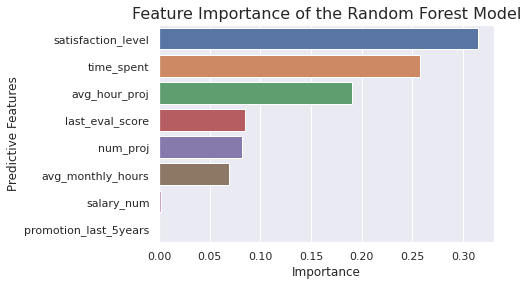

In [141]:
importances = pd.DataFrame({'Predictors': X_train.columns, 'Importance': rf_opt.feature_importances_ 
                            }).sort_values(by = 'Importance', ascending=False)
ax = sns.barplot(data = importances, x = 'Importance', y = 'Predictors')
plt.title('Feature Importance of the Random Forest Model', fontsize = 16)
plt.ylabel('Predictive Features')
plt.show()

In [142]:
importances

,Predictors,Importance
0,satisfaction_level,0.314778
4,time_spent,0.257142
6,avg_hour_proj,0.190564
1,last_eval_score,0.084507
2,num_proj,0.081847
3,avg_monthly_hours,0.069243
7,salary_num,0.001616
5,promotion_last_5years,0.000303


### Permutation importance of the random forest model
This is to try out the permutation importance feature provided by sklearn.inspection. The result is not used in the executive report as the "time_spent" and "avg_hour_proj" is highly correlated, which biases the permutation test.

In [152]:
from sklearn.inspection import permutation_importance

In [211]:
result = permutation_importance(rf_opt, X_test, y_test, n_repeats=10, scoring = 'recall', random_state=42, n_jobs=-1)

In [212]:
result

{'importances_mean': array([0.63517588, 0.46984925, 0.3958124 , 0.16532663, 0.3041876 ,
        0.        , 0.20050251, 0.        ]),
 'importances_std': array([0.01719347, 0.01101587, 0.01032701, 0.01275784, 0.01160986,
        0.        , 0.01191637, 0.        ]),
 'importances': array([[0.639866  , 0.67169179, 0.65661642, 0.63484087, 0.62646566,
         0.62144054, 0.62981575, 0.60636516, 0.63149079, 0.63316583],
        [0.4840871 , 0.47571189, 0.46063652, 0.45561139, 0.4840871 ,
         0.47738693, 0.47906198, 0.46063652, 0.46733668, 0.45393635],
        [0.38358459, 0.40033501, 0.38525963, 0.38023451, 0.39865997,
         0.41708543, 0.40033501, 0.40201005, 0.39865997, 0.3919598 ],
        [0.16917923, 0.15242881, 0.14070352, 0.15745394, 0.17755444,
         0.18927973, 0.17252931, 0.16582915, 0.1641541 , 0.1641541 ],
        [0.31155779, 0.28643216, 0.29815745, 0.29815745, 0.30485762,
         0.29145729, 0.30150754, 0.32160804, 0.30318258, 0.32495812],
        [0.        , 0.

In [213]:
sorted_idx = result.importances_mean.argsort()
importances= pd.DataFrame(result.importances[sorted_idx].T, columns=X_rf.columns[sorted_idx])

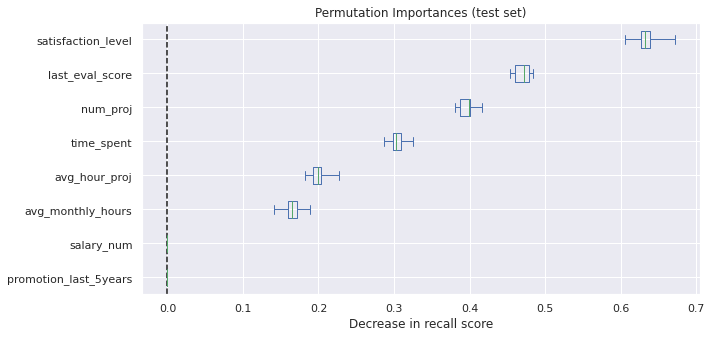

In [214]:
fig,ax = plt.subplots(figsize=(10, 5))
importances.plot.box(vert=False, whis=10, ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in recall score")
plt.show()

### Summary of model results

Whereas the logistic regression models achieve satisfying results with a recall score of 87%, the random forest model out performs significantly by achieving a recall score of 93% while keeping an almost perfect precision score of 99%, which is below 50% for the logistic regression models.

### Conclusion, Recommendations, Next Steps
Key insights: 
The most relevant predictors of employee turnover are satisfaction score, how long has the employee beening working for the company (in years) and average hours worked on each projects. 
Other contributing factors that are less predictive are the evaluation score, total number of projects worked on and average monthly workign hours. 
Interestingly and perhaps unintuitively, salary level and whether the employee has been promoted in the past five years have almost no bearing on the turnover in our model, given the presence of all the other predictors mentioned previously. 
Department and work incident have been excluded from model building earlier in the data analysis process through hypothesis testing. 

Recommendations:
1. Invite employees for job satisfaction interviews with the HR department. The content should be kept confidential, especially from the managers. 
2. Proactively reach out to employees who have completed their 4th anniversary with company, as the data shows that they are likely to churn in the 5th year. Perhaps they feel stagnated in their career and need either promotion or job rotation to learn something new.
3. Closely monitor the working hours employees spend on each project. Proactively reach out to employees who are overworked to gauge their wellbeing, or reach out to those have been working for one project for a very long time to see if they are still happy and if they would like a change. 
Potential improvement and next steps:
1. Based on the current result, we can build a cluster model on top to hopefully yield more insights on the common characteristics of the surveyed employees who have left the company.
2. For the future survey design, instead of a generic satisfaction level, we could break it down according to topics, such as work-life balance, feeling supported from colleagues, job alignment with one's ambition/potential, holiday/flexible work policy, etc.
Ethical considerations: None


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.